In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))

In [3]:
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

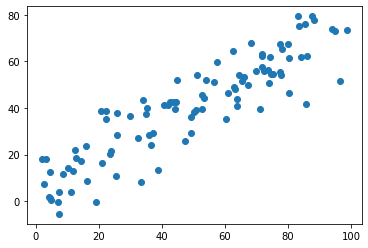

In [4]:
plt.scatter(X[:,0], X[:,1])

# demean

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

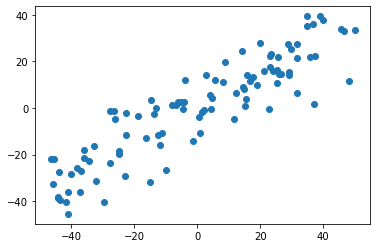

In [7]:
plt.scatter(X_demean[:,0], X_demean[:,1])

## 梯度上升法

In [8]:
def f(w,X):
    return np.sum((X @ w)**2)/len(X)

In [9]:
def df_math(w,X):
    return (X.T @ (X @ w)) * 2 /len(X)

In [10]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/ (2 * epsilon)
    return res
    

In [11]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    cur_iter = 0 
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = direction(w + eta * gradient)
        if(abs(f(w,X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [12]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.35444119, 0.15206798])

In [13]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据

In [14]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79642661, 0.60473519])

In [15]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79642661, 0.60473519])

In [16]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

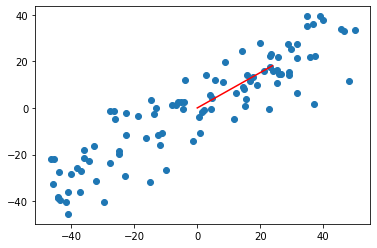

In [17]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

# 使用极端数据集测试

In [18]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

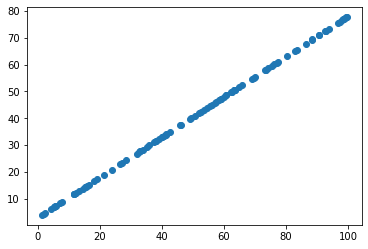

In [19]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()


In [20]:
X2_demean = demean(X2)

In [21]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

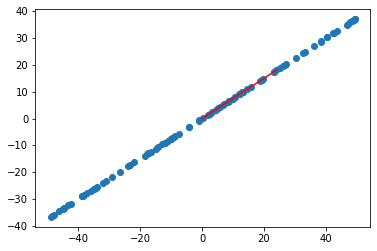

In [22]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

# 随机梯度上升法

In [ ]:
def dJ_sgd(w, X_i):
    return (X_i.T @ (X_i @ w)) * 2 /len(X)

def sgd(X, initial_w, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(initial_w))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta